In [54]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

# neighborhood column focus
steps = pd.read_csv("steps.csv", index_col="neighborhood", parse_dates=True)

# initialize dictionary
neighborhoods = dict()

# add up number of steps/stairways per neighborhood
for name in steps.index:
    if name not in neighborhoods:
        neighborhoods[name] = 1
    else:
        neighborhoods[name] += 1

# sorts the neighborhood based on item[1], the value/#steps in dict.
sorted_neighborhoods = dict(sorted(neighborhoods.items(), key=lambda item: item[1]))

print(sorted_neighborhoods)

{'Mount Oliver Borough': 1, 'Strip District': 1, 'Chartiers City': 1, 'Glen Hazel': 1, 'Larimer': 1, 'Bluff': 1, 'Manchester': 1, 'East Liberty': 1, 'Bon Air': 2, 'St. Clair': 2, 'Windgap': 2, 'East Carnegie': 2, 'Shadyside': 2, 'South Shore': 2, 'Point Breeze North': 2, 'Central Northside': 3, 'Ridgemont': 3, 'Esplen': 3, 'North Shore': 3, 'Allegheny West': 3, 'North Oakland': 4, 'East Allegheny': 4, 'Crawford-Roberts': 4, 'Regent Square': 4, 'Central Oakland': 5, 'West End': 5, 'Terrace Village': 5, 'Oakwood': 5, 'Bedford Dwellings': 6, 'West Oakland': 6, 'Allegheny Center': 6, 'Banksville': 7, 'Morningside': 7, 'Squirrel Hill North': 7, 'Mt. Oliver': 7, 'Bloomfield': 7, 'Lincoln Place': 7, 'Central Business District': 7, 'Knoxville': 8, 'Point Breeze': 8, 'South Side Flats': 8, 'California-Kirkbride': 9, 'Homewood North': 9, 'Crafton Heights': 9, 'East Hills': 9, 'Central Lawrenceville': 9, 'South Oakland': 10, 'Middle Hill': 11, 'Upper Lawrenceville': 12, 'Lincoln-Lemington-Belmar'

In [55]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

fires=pd.read_csv(r"fires/fireincidents.csv")
fires=fires[pd.isna(fires['neighborhood'])==False]
fires['neighborhood'].replace("Mount Oliver Borough","Mt. Oliver",inplace=True)

neighborhoods=gpd.read_file(r"neighborhoods/Neighborhoods_.shp")
weighted_fires=pd.DataFrame({'hood':fires['neighborhood'].unique()})
weighted_fires['weighted_fires'] = weighted_fires['hood'].apply(
    lambda nb:sum( fires[fires['neighborhood']==nb]["alarms"]+1)
)

fireDict = weighted_fires.set_index('hood').T.to_dict('list')
print(fireDict)

{'Fineview': [78], 'Fairywood': [40], 'South Side Flats': [426], 'Allegheny Center': [88], 'Lincoln-Lemington-Belmar': [333], 'Carrick': [477], 'Beechview': [229], 'Allentown': [218], 'Beltzhoover': [222], 'Crafton Heights': [143], 'Homewood North': [305], 'Squirrel Hill South': [401], 'Perry North': [178], 'Bedford Dwellings': [82], 'Homewood South': [316], 'East Allegheny': [220], 'Crawford-Roberts': [178], 'Sheraden': [286], 'Middle Hill': [181], 'Strip District': [104], 'East Hills': [260], 'Garfield': [191], 'Greenfield': [179], 'North Shore': [78], 'Spring Hill-City View': [169], 'Central Business District': [459], 'Upper Hill': [88], 'Manchester': [130], 'Overbrook': [82], 'Polish Hill': [53], 'Central Lawrenceville': [120], 'Brookline': [298], 'Marshall-Shadeland': [235], 'North Oakland': [233], 'South Oakland': [147], 'Homewood West': [93], 'East Liberty': [336], 'Hazelwood': [370], 'Squirrel Hill North': [244], 'Friendship': [46], 'West Oakland': [98], 'Terrace Village': [139

In [56]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

trafRaw = pd.read_csv("PittTraffic.csv")
trafRaw.head()
traf = trafRaw[trafRaw['average_daily_car_traffic'].notna()]

neighborhoods = dict()
i = 0
for name in traf.iloc[:, 18]:
    if name not in neighborhoods:
        if traf.iat[i, 6]!= 0:
            neighborhoods[name] = traf.iat[i, 6]
            #print("here\n")
        else: 
            neighborhoods[name] = 0
            #print("or here\n")
    else:
        if traf.iat[i, 6]!= 0:
            neighborhoods[name] += traf.iat[i, 6]
            #print("or maybe\n")
        else:
            neighborhoods[name] += 0
            #print("pls here\n")
    i += 1
print(neighborhoods)


{'Polish Hill': 15894.0, 'Squirrel Hill South': 79302.0, 'Central Northside': 5945.0, 'Bluff': 5365.0, 'Crafton Heights': 11500.0, 'Shadyside': 66132.0, 'Highland Park': 23471.0, 'North Shore': 10350.0, 'East Liberty': 51247.0, 'Mount Washington': 47336.0, 'Brookline': 39144.0, 'Squirrel Hill North': 35452.0, 'Bloomfield': 43101.0, 'Larimer': 37713.0, 'Friendship': 4887.0, 'Point Breeze': 31242.0, 'Regent Square': 16729.0, 'Central Lawrenceville': 13499.0, 'Knoxville': 7646.0, 'Central Oakland': 11306.0, 'Strip District': 29075.0, 'Greenfield': 7158.0, 'Windgap': 3062.0, 'Beechview': 4255.0, 'Upper Hill': 2860.0, 'Stanton Heights': 16272.0, 'Manchester': 21293.0, 'South Side Slopes': 26447.0, 'Perry North': 19114.0, 'North Oakland': 23821.0, 'East Hills': 16253.0, 'Duquesne Heights': 5831.0, 'Sheraden': 8532.0, 'Morningside': 14345.0, 'Central Business District': 2305.0, 'St. Clair': 2436.0, 'Perry South': 12075.0, 'Elliott': 4028.0, 'Carrick': 13787.0, 'Westwood': 15400.0, 'Allegheny 

{'Lincoln Place': 174.5, 'Fineview': 372.49999999999994, 'Allegheny West': 387.59999999999997, 'Lincoln-Lemington-Belmar': 442.2, 'South Side Flats': 467.90000000000003, 'Overbrook': 627.1999999999999, 'Spring Garden': 896.1999999999999, 'Beltzhoover': 1319.6999999999998, 'East Allegheny': 1546.8, 'St. Clair': 1721.4999999999998, 'Allegheny Center': 1752.3999999999999, 'Chartiers City': 1822.6999999999998, 'West Oakland': 1900.6999999999998, 'Spring Hill-City View': 1972.2999999999997, 'Central Business District': 2030.1, 'Upper Hill': 2091.7, 'Hazelwood': 2148.8, 'Windgap': 2174.1, 'Lower Lawrenceville': 2521.7, 'Elliott': 2934.7999999999997, 'Beechview': 3205.6, 'Arlington': 3280.1, 'Bluff': 3963.8999999999996, 'Duquesne Heights': 4154.9, 'Central Northside': 4362.8, 'Greenfield': 5191.7, 'Homewood North': 5197.9, 'Brighton Heights': 5524.299999999999, 'Knoxville': 5640.599999999999, 'Sheraden': 6247.299999999999, 'Point Breeze North': 7028.9, 'North Shore': 7316.699999999999, 'Centr

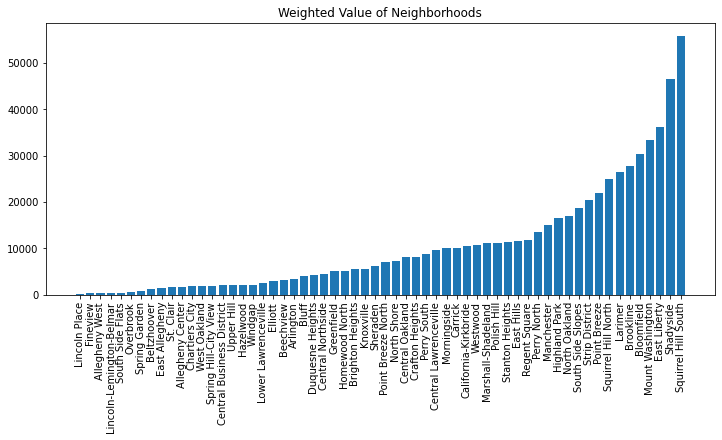

In [59]:
weighted = dict()
for x in neighborhoods:
    if x in sorted_neighborhoods:
        if x in fireDict:
            fireNum = 0.9*(fireDict.get(x)[0])
            stepNum = 0.5*(sorted_neighborhoods.get(x))
            trafNum = 0.7*(neighborhoods.get(x))
            weighted[x] = (stepNum + trafNum + fireNum)

sorted_weight = dict(sorted(weighted.items(), key=lambda item: item[1]))
print(sorted_weight)

count = 0
for name in sorted_weight:
    if count<10:
        print(name)
    count += 1

fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(sorted_weight.keys(), sorted_weight.values())
ax.set_title("Weighted Value of Neighborhoods")
plt.xticks(rotation=90)

plt.show()